##**MACHINE LEARNING MODEL IMPLEMENTATIONS**
--------------------------------------------------------------------------------

**LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------

# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

In [89]:
# %pip install sdv
# %pip install urllib3==1.26.7

In [90]:
# import pandas as pd
# real_data = pd.read_excel('diabetes2.xlsx')

# from sdv.metadata import SingleTableMetadata

# metadata = SingleTableMetadata()
# metadata.detect_from_dataframe(data=real_data)

# from sdv.lite import SingleTablePreset

# synthesizer = SingleTablePreset(
#     metadata,
#     name='FAST_ML'
# )

# synthesizer.fit(data=real_data)

# synthetic_data = synthesizer.sample(num_rows=500)

# synthesizer.save('synthetic_dataset.pkl')

# synthesizer = SingleTablePreset.load('synthetic_dataset.pkl')
# synthetic_data.to_csv('synthetic_dataset.csv', index=False)
# synthetic_data.to_excel('synthetic_dataset.xlsx', index=False)

# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

In [91]:
# Installing Modules
%pip install numpy
%pip install pandas
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# from sklearn.model_selection import train_test_split

# Importing dataset and creating a dataframe using Pandas
df = pd.read_csv('synthetic_dataset.csv')

# Creating features Matrix X
X = df.iloc[:, :-1].values
# Creating Target Vector y
y = df.iloc[:, -1].values

# Handling Missing Data by replacing it with 0.
df.isnull().sum()
df = df.fillna(0)

# Handling Outliers in the dataset using IQR Method
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outlier_rows = (df < lower_bound) | (df > upper_bound)
df = df[~outlier_rows]

ratio = 0.8
total_rows = X.shape[0]
train_size = int(total_rows*ratio)

# Split data into test and train
X_train = X[0:train_size]
X_test = X[train_size:]
ratio = 0.8
total_rows = y.shape[0]
train_size = int(total_rows*ratio)

# Split data into test and train
y_train = y[0:train_size]
y_test = y[train_size:]
# Splitting Data into test and train set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
print(len(X_train))

400


In [94]:
print(len(y_train))

400


# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***


**Some Utility Functions that are common to both Stochastic and Batch Gradient Descend Algorithm**

In [95]:
# This function is used to compute the value of cost function for a set of parameters w and b.
def computeCostFunction(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(0, m):
        predictedY = np.dot(X[i], w) + b
        cost = cost + (predictedY - y[i]) ** 2

    return cost

## **_Stochastic Gradient Descent_**

**Implementation of SGD**

In [96]:
import math, copy, random
# Edit another sgd function using number of rows:
# This is the function that is used to compute the average gradient for given set of parameters.
def computeGradientForASingleSample(X, y, w, b):
    # m = number of training examples in the dataset
    m = X.shape[0]
    # n = number of featrues in the dataset
    n = X.shape[1]

    # Stores the gradient of the cost function for the parameters w.
    gradientW = np.zeros((n,))
    # Stores the gradient of the cost function for the parameters b.
    gradientB = 0.0

    i = random.randint(0, m - 1)

    x = X[i]
    actualY = y[i]
    predictedY = np.dot(x, w) + b
    errorValue = (predictedY - actualY)

    for j in range(n):
        gradientW[j] = gradientW[j] + (errorValue * X[i, j])

    gradientB = gradientB + errorValue

    return gradientW, gradientB

def stochasticGradientDescendAlgorithm(X, y, wInitialVal, bInitialVal, alpha, Niterations):
    # An array to store cost J and w's at each iteration primarily for graphing later
    storeCostAndwForGraphing = []

    # Values of Parameters
    w = copy.deepcopy(wInitialVal)
    b = bInitialVal

    for i in range(0, Niterations):

        # Calculate the gradient values and update the parameters
        (djBYdb, djBYdw) = computeGradientForASingleSample(X, y, w, b)

        # Update the value of the parameters and gradient
        b = b - alpha * djBYdw
        w = w - alpha * djBYdb

        # Storing the cost J and value of the parameters for graphing purpose.
        # If condition keeps a check to prevent overflow of resources.
        if i<100000:
            storeCostAndwForGraphing.append(computeCostFunction(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        # if i% math.ceil(Niterations / 10) == 0:
        #     print(f"Iteration {i:4d}: Cost {storeCostAndwForGraphing[-1]:8.2f}   ")

    wOptiomal, bOptimal = w, b

    return wOptiomal, bOptimal, storeCostAndwForGraphing

**Calling SGD to train our model**

In [97]:
# m : Number of training examples
# n : Number of features in the given dataset
m, n = X_train.shape

# Initializing values of b and w for gradient descend algorithm
wInitialVal = np.array([1,1,1,1,1,1,1,1])
bInitialVal = 0.256

# Total number of iteration
iterations = 1000

# Learning Rate of our gradient Descend
alpha = 5.0e-7

# Running gradient descent algorithm
wFinalValSGD, bFinalValSGD, costHistoryStoreSGD = stochasticGradientDescendAlgorithm(X_train, y_train, wInitialVal, bInitialVal, alpha, iterations)

In [98]:
print(f"The Values of w: {wFinalValSGD}\nThe Value of b: {bFinalValSGD}")

The Values of w: [ 0.93719269 -0.37746014 -0.0158631   0.63461539 -0.03575239  0.55947266
  0.99281411  0.52080534]
The Value of b: 0.2426681958797506


## **_Batch Gradient Descent_**

**Implementation of BGD**

In [99]:
import math, copy, random

# This is the function that is used to compute the average gradient for given set of parameters.
def computeGradientForAllm(X, y, w, b):
    # m = number of training examples in the dataset
    m = X.shape[0]
    # n = number of featrues in the dataset
    n = X.shape[1]

    # Stores the gradient of the cost function for the parameters w.
    gradientW = np.zeros((n,))
    # Stores the gradient of the cost function for the parameters b.
    gradientB = 0.0

    for i in range(m):
        x = X[i]
        actualY = y[i]
        predictedY = np.dot(x, w) + b
        errorValue = (predictedY - actualY)

        for j in range(n):
            gradientW[j] = gradientW[j] + (errorValue * X[i, j])

        gradientB = gradientB + errorValue

    # Taking the average of the gradient values for all the parameters.
    gradientW = gradientW / m
    gradientB = gradientB / m

    return gradientW, gradientB

def batchGradientDescendAlgorithm(X, y, wInitialVal, bInitialVal, alpha, Niterations, computeGradientFunction, computeCostFx):
    # An array to store cost J and w's at each iteration primarily for graphing later
    storeCostAndwForGraphing = []

    # Values of Parameters
    w = copy.deepcopy(wInitialVal)
    b = bInitialVal

    for i in range(0, Niterations):

        # Calculate the gradient values and update the parameters
        (djBYdb, djBYdw) = computeGradientFunction(X, y, w, b)

        # Update the value of the parameters and gradient
        w = w - alpha * djBYdb
        b = b - alpha * djBYdw

        # Storing the cost J and value of the parameters for graphing purpose.
        # If condition keeps a check to prevent overflow of resources.
        if i<100000:
            storeCostAndwForGraphing.append(computeCostFx(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        # if i% math.ceil(Niterations / 10) == 0:
        #     print(f"Iteration {i:4d}: Cost {storeCostAndwForGraphing[-1]:8.2f}   ")

    wOptiomal, bOptimal = w, b

    return wOptiomal, bOptimal, storeCostAndwForGraphing

**Calling BGD Algorithm to train our model**

In [100]:
# m : Number of training examples
# cn : Number of features in the given dataset
m, n = X_train.shape

# Initializing values for gradient descend algorithm
wInitialVal = np.array([1,1,1,1,1,1,1,1])
bInitialVal = 0.256


# Total number of iteration
iterations = 1000

# Learning Rate of our gradient Descend
alpha = 5.0e-7

# Running gradient descent algorithm
wFinalValBGD, bFinalValBGD, costHistoryStoreBGD = batchGradientDescendAlgorithm(X_train, y_train, wInitialVal, bInitialVal, alpha, iterations, computeGradientForAllm, computeCostFunction)

In [101]:
print(f"The Values of w: {wFinalValBGD}\nThe Value of b: {bFinalValBGD}")

The Values of w: [ 0.94037716 -0.40470782  0.0108667   0.64523894 -0.0367647   0.55006136
  0.9931389   0.52803762]
The Value of b: 0.24291071615267512


## **_Insights drawn (plots, markdown explanations)_**

**Cost vs Iteration Plot for Stochastic & Batch Gradient Descend Algorithm**

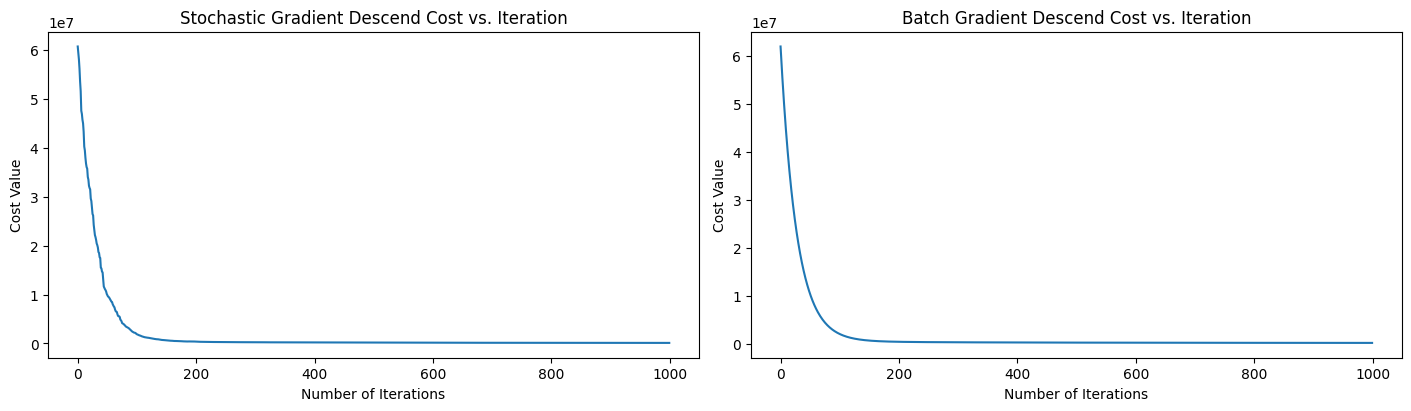

In [102]:
fig, (SGDcurve, BGDcurve) = plt.subplots(1, 2, constrained_layout=True, figsize=(14, 4))
SGDcurve.plot(costHistoryStoreSGD)
BGDcurve.plot(costHistoryStoreBGD)
SGDcurve.set_title("Stochastic Gradient Descend Cost vs. Iteration");  BGDcurve.set_title("Batch Gradient Descend Cost vs. Iteration")
SGDcurve.set_ylabel('Cost Value')             ;  BGDcurve.set_ylabel('Cost Value')
SGDcurve.set_xlabel('Number of Iterations')   ;  BGDcurve.set_xlabel('Number of Iterations')
plt.show()

###**Explaination of Above Results**

**The major difference between the batch and stochastic gradient descend**

The Batch gradient descend algorithm calculates gradient by computing gradient for all the training examples and taking the average of all the m computed gradients. The Stochastic Gradinet Descend Algorithm on the other hand picks one of the training example randomly and computes its gradient to update the parameters.

**Major difference between the two Curves**

1. The Curve of Batch Gradient Descent is much more smoother than Stochastic Gradient Descend which is noisy and have many fluctuations. In BGD, the cost descreases gradually and it converges to a minimum value while the cost increase or descrease in less predictable manner in SGD.

2. The BGD is much slower to converse when dealing with large dataset as it computes gradient for all m training examples while the SDG converges faster but is more noisy and less predictable

###**Comparing Costs for Test Set**

**Cost of Test Set for Model Trainied with Stochastic Gradient Descend**

In [103]:
costTestSetSGD = computeCostFunction(X_test, y_test, wFinalValSGD, bFinalValSGD)
print(costTestSetSGD)

20578.675009942413


**Cost of Test Set for Model Trainied with Batch Gradient Descend**

In [104]:
costTestSetBGD = computeCostFunction(X_test, y_test, wFinalValBGD, bFinalValBGD)
print(costTestSetBGD)

21937.058019510863


**Plotting the results**

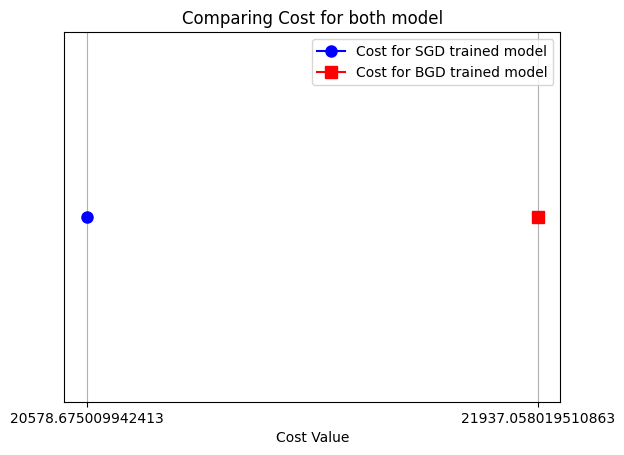

In [105]:
fig, ax = plt.subplots()

# Plot markers for number1 and number2
ax.plot(costTestSetSGD, 0, marker='o', markersize=8, color='blue', label='Cost for SGD trained model')
ax.plot(costTestSetBGD, 0, marker='s', markersize=8, color='red', label='Cost for BGD trained model')

# Add a legend
ax.legend()

# Set ticks and labels for the number line
ax.set_xticks([costTestSetSGD, costTestSetBGD])
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xticklabels([costTestSetSGD, costTestSetBGD])

# Add labels and title
ax.set_xlabel('Cost Value')
ax.set_title('Comparing Cost for both model')

# Show the plot
plt.grid(True)
plt.show()


**Results**

We can see that the cost for SGD trained model is lower than the BGD model in this case. But we cannot generalize this result as the overall cost depends on the dataset, learning rate, model etc.

# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**

**Adding Polynomial Features to our dataset**

We are adding polynomial ranging from degree 1 to 10 for all the existing features of the dataset. Therefore, our new dataset has 80 features. Making it a polynomial regression.



In [106]:
X_trainReg = X_train.copy() # Creating Deep copy of the variable
X_testReg = X_test.copy() # Creating Deep copy of the variable

# Adding polynomial features to train set
for pow in range(2,11):
    newColumns = X_train ** pow
    X_trainReg = np.hstack((X_trainReg, newColumns))

# Adding polynomial features to test set
for pow in range(2,11):
    newColumns = X_test ** pow
    X_testReg = np.hstack((X_testReg, newColumns))

In [107]:
print(f"Total Number of Features in modified Dataset: {X_trainReg.shape[1]}")

Total Number of Features in modified Dataset: 80


In [108]:
print(X_trainReg)

[[7.00000000e+00 1.49000000e+02 9.60000000e+01 ... 6.94845156e+15
  3.10591448e-03 1.04857600e+16]
 [0.00000000e+00 1.51000000e+02 4.40000000e+01 ... 1.48155050e+14
  4.62167878e-04 2.05891132e+14]
 [3.00000000e+00 1.69000000e+02 5.70000000e+01 ... 1.63905708e+15
  2.16217997e-03 3.65615844e+15]
 ...
 [5.00000000e+00 4.70000000e+01 7.60000000e+01 ... 3.23468678e+15
  4.50939061e-05 4.20707233e+14]
 [5.00000000e+00 8.80000000e+01 5.00000000e+01 ... 3.50966382e+13
  5.57067284e-10 8.19628287e+14]
 [1.00000000e+00 1.14000000e+02 5.80000000e+01 ... 3.12288023e+11
  1.73845308e-04 4.20707233e+14]]


In [109]:
print(X_testReg)

[[9.00000000e+00 1.38000000e+02 7.10000000e+01 ... 3.52351863e+14
  5.05050928e+00 1.12589991e+15]
 [2.00000000e+00 1.10000000e+02 5.40000000e+01 ... 3.71285118e+14
  2.61073660e-01 4.80858437e+15]
 [6.00000000e+00 7.50000000e+01 9.20000000e+01 ... 3.94649516e+13
  5.12892129e-07 4.24207475e+16]
 ...
 [4.00000000e+00 1.81000000e+02 3.50000000e+01 ... 2.86884024e+15
  2.42191283e-04 2.75854735e+15]
 [4.00000000e+00 1.52000000e+02 8.10000000e+01 ... 4.42653627e+15
  1.38954770e-01 3.40506289e+16]
 [1.00000000e+00 1.09000000e+02 5.50000000e+01 ... 1.02580991e+16
  1.89870434e-02 1.66798810e+13]]


**Normalizing the dataset**

We are normalizing the dataset because we are now dealing with polynomial regression and calucluate 10th power of a feature is causing overflow. So we are handling it using the normalization technique.

Apart from it normalization also has many other benifits.

In [110]:
# Computing the mean of dataset
mu = np.mean(X_trainReg)
# Computing the standard deviation of the dataset
sigma = np.std(X_trainReg)

X_trainReg = (X_trainReg - mu) / sigma
X_testReg = (X_testReg - mu) / sigma

In [111]:
X_trainReg

array([[-0.0193405 , -0.0193405 , -0.0193405 , ..., -0.01934049,
        -0.0193405 , -0.01934048],
       [-0.0193405 , -0.0193405 , -0.0193405 , ..., -0.0193405 ,
        -0.0193405 , -0.0193405 ],
       [-0.0193405 , -0.0193405 , -0.0193405 , ..., -0.0193405 ,
        -0.0193405 , -0.0193405 ],
       ...,
       [-0.0193405 , -0.0193405 , -0.0193405 , ..., -0.0193405 ,
        -0.0193405 , -0.0193405 ],
       [-0.0193405 , -0.0193405 , -0.0193405 , ..., -0.0193405 ,
        -0.0193405 , -0.0193405 ],
       [-0.0193405 , -0.0193405 , -0.0193405 , ..., -0.0193405 ,
        -0.0193405 , -0.0193405 ]])

In [112]:
X_testReg

array([[-0.0193405 , -0.0193405 , -0.0193405 , ..., -0.0193405 ,
        -0.0193405 , -0.0193405 ],
       [-0.0193405 , -0.0193405 , -0.0193405 , ..., -0.0193405 ,
        -0.0193405 , -0.01934049],
       [-0.0193405 , -0.0193405 , -0.0193405 , ..., -0.0193405 ,
        -0.0193405 , -0.01934042],
       ...,
       [-0.0193405 , -0.0193405 , -0.0193405 , ..., -0.0193405 ,
        -0.0193405 , -0.0193405 ],
       [-0.0193405 , -0.0193405 , -0.0193405 , ..., -0.01934049,
        -0.0193405 , -0.01934044],
       [-0.0193405 , -0.0193405 , -0.0193405 , ..., -0.01934048,
        -0.0193405 , -0.0193405 ]])

**Lambda Value for Regularization**

In [113]:
lambdaVal = 0.5

## **_Lasso Regression_**

**Implementing Lasso Regression**

In [114]:
# This function is used to compute the value of cost function along with the L1 Regularization for a set of parameters w and b.
def computeCostFunctionL1Reg(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(0, m):
        predictedY = np.dot(X[i], w) + b
        cost = cost + (predictedY - y[i]) ** 2

    cost = cost + lambdaVal * np.sum(np.abs(w))

    return cost


# This function calculates the gradient by adding an L1 Regularization term to the final value
def computeGradientWithL1(X, y, w, b):
    # m : Number of training examples and n : Number of features in the given dataset
    m = X.shape[0]
    n = X.shape[1]

    gradientW = np.zeros((n,))
    gradientB = 0.0

    for i in range(m):
        x = X[i]
        actualY = y[i]
        predictedY = np.dot(x, w) + b
        errorValue = (predictedY - actualY)

        for j in range(n):
          gradientW[j] = gradientW[j] + (errorValue * X[i, j])

        gradientB = gradientB + errorValue

    # L1 regularization penalty term for gradientW
    for j in range(n):
      if w[j] != 0:
        gradientW[j] = gradientW[j] + (w[j] / abs(w[j])) * lambdaVal


    gradientW = gradientW / m
    gradientB = gradientB / m

    return gradientW, gradientB

**Training Lasso Regression using batch gradient descend algorithm**

In [115]:
# m : Number of training examples and n : Number of features in the given dataset
m, n = X_trainReg.shape


# Initializing values for gradient descend algorithm
wInitialVal = np.zeros(n, )
bInitialVal = 0.256


# Total number of iteration
iterations = 1000

# Learning Rate of our gradient Descend
alpha = 5.0e-3

# run gradient descent
wFinalValLasso, bFinalValLasso, costHistoryStoreLasso = batchGradientDescendAlgorithm(X_trainReg, y_train, wInitialVal, bInitialVal, alpha, iterations, computeGradientWithL1, computeCostFunctionL1Reg)


In [116]:
print(f"The Values of w: {wFinalValLasso}\nThe Value of b: {bFinalValLasso}")

The Values of w: [-5.68680721e-06 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06
 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06
 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06
 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06
 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06
 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06
 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06
 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06
 -5.68680721e-06 -5.68680711e-06 -5.68680721e-06 -5.68680721e-06
 -5.68680701e-06 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06
 -5.68680721e-06 -5.68678999e-06 -5.68680701e-06 -5.68680721e-06
 -5.68676025e-06 -5.68680721e-06 -5.68680721e-06 -5.68680721e-06
 -5.68680721e-06 -5.68377699e-06 -5.68678418e-06 -5.68680712e-06
 -5.67605510e-06 -5.68680699e-06 -5.68680721e-06 -5.68680704e-06
 -5.68680721e-06 -5.14706168e-06 -5.68417704e-06 -5.68680253e-06
 -3.4505

## **_Ridge Regression_**

**Implementing Ridge Regression**

In [117]:
# This function is used to compute the value of cost function along with the L2 Regularization for a set of parameters w and b.
def computeCostFunctionL2Reg(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(0, m):
        predictedY = np.dot(X[i], w) + b
        cost = cost + (predictedY - y[i]) ** 2

    cost = cost + (lambdaVal / (2 * m)) * np.sum(w ** 2)

    return cost


# This function calculates the gradient by adding an L2 Regularization term to the final value
def computeGradientWithL2(X, y, w, b):
    m = X.shape[0]
    n = X.shape[1]

    gradientW = np.zeros((n,))
    gradientB = 0.0

    for i in range(m):
        x = X[i]
        actualY = y[i]
        predictedY = np.dot(x, w) + b
        errorValue = (predictedY - actualY)

        for j in range(n):
            gradientW[j] = gradientW[j] + (errorValue * X[i, j])

        gradientB = gradientB + errorValue

    # L2 regularization penalty term for gradientW
    for j in range(n):
        gradientW[j] = gradientW[j] + 2 * lambdaVal * w[j]

    gradientW = gradientW / m
    gradientB = gradientB / m
    return gradientW, gradientB

**Training Ridge Regression using batch gradient descend algorithm**

In [118]:
# m : Number of training examples and n : Number of features in the given dataset
m, n = X_trainReg.shape

# Initializing values for gradient descend algorithm
wInitialVal = np.zeros(n, )
bInitialVal = 0.256

# Total number of iteration
iterations = 1000

# Learning Rate of our gradient Descend
alpha = 5.0e-3

# run gradient descent
wFinalValRidge, bFinalValRidge, costHistoryStoreRidge = batchGradientDescendAlgorithm(X_trainReg, y_train, wInitialVal, bInitialVal, alpha, iterations, computeGradientWithL2, computeCostFunctionL2Reg)

In [119]:
print(f"The Values of w: {wFinalValRidge}\nThe Value of b: {bFinalValRidge}")

The Values of w: [-0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505
 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505
 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505
 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505
 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505
 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505
 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505
 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00156505
 -0.00156505 -0.00156504 -0.00156505 -0.00156505 -0.00156504 -0.00156505
 -0.00156505 -0.00156505 -0.00156505 -0.00156451 -0.00156504 -0.00156505
 -0.00156288 -0.00156505 -0.00156505 -0.00156505 -0.00156505 -0.00146858
 -0.00156475 -0.00156505 -0.00122003 -0.00156505 -0.00156505 -0.00156505
 -0.00156505  0.01602909 -0.00153026 -0.00156503  0.00460426 -0.00156502
 -0.00156505 -0.00156504]
The Valu

## **_Insights drawn (plots, markdown explanations)_**

**Cost vs Iteration Plot for Lasso & Ridge Regularization**

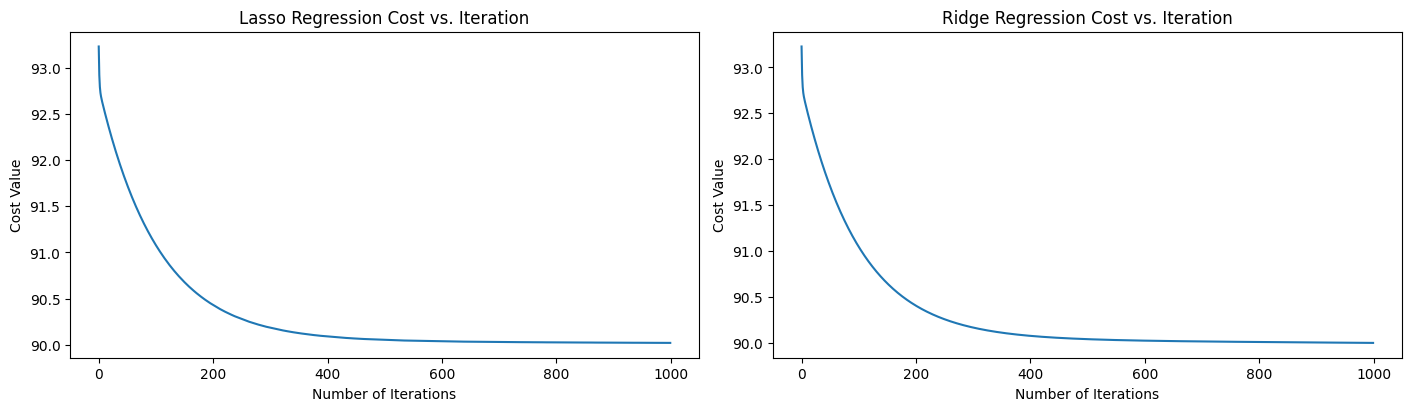

In [120]:
fig, (Lassocurve, Ridgecurve) = plt.subplots(1, 2, constrained_layout=True, figsize=(14, 4))
Lassocurve.plot(costHistoryStoreLasso)
Ridgecurve.plot(costHistoryStoreRidge)
Lassocurve.set_title("Lasso Regression Cost vs. Iteration");  Ridgecurve.set_title("Ridge Regression Cost vs. Iteration")
Lassocurve.set_ylabel('Cost Value')             ;  Ridgecurve.set_ylabel('Cost Value')
Lassocurve.set_xlabel('Number of Iterations')   ;  Ridgecurve.set_xlabel('Number of Iterations')
plt.show()

###**Explaination of Above Results**

**The major difference between the Lasso and Ridge Regularization**

1. The penalty term that is used in L1 Regularization is L1 norm that is sum of absolute values of all the parameters, w. While in case of L2 Regularization we use L2 norm which is sum of squares of the parameters, w.

2. L1 Regularization produces spare models and it sets coefficent of less important features to zero. But in case of L2 regularization all the features are retained.

3. L1 Regularization uses absoulte value which makes the derivate at x = 0 not defined. So, making it difficult to compute mathematically when compared to L2 regularization.

4. L1 Regularization is preffered when we have a large number of features and whe suspect that some of them are not useful at all. So, we can do feature selection and set parameters of less important features to 0. While L2 Regularization is used when we have large number of features and we want to reduce impact of highly correlated features without eliminating features.

###**Comparing Costs for Test Set**

**Cost of Test Set for Model Trainied with Stochastic Gradient Descend**

In [121]:
costTestSetLasso = computeCostFunctionL1Reg(X_testReg, y_test, wFinalValLasso, bFinalValLasso)
print(costTestSetLasso)

19.947076865872884


**Cost of Test Set for Model Trainied with Batch Gradient Descend**

In [122]:
costTestSetRidge = computeCostFunctionL2Reg(X_testReg, y_test, wFinalValRidge, bFinalValRidge)
print(costTestSetRidge)

19.93625515421389


**Plotting the results**

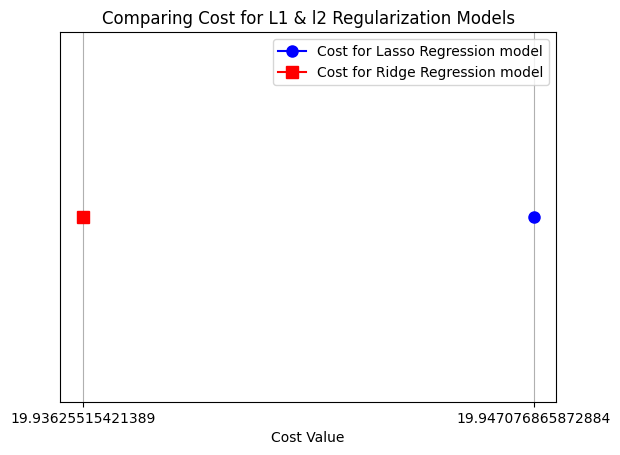

In [123]:
fig, ax = plt.subplots()

# Plot markers for number1 and number2
ax.plot(costTestSetLasso, 0, marker='o', markersize=8, color='blue', label='Cost for Lasso Regression model')
ax.plot(costTestSetRidge, 0, marker='s', markersize=8, color='red', label='Cost for Ridge Regression model')

# Add a legend
ax.legend()

# Set ticks and labels for the number line
ax.set_xticks([costTestSetLasso, costTestSetRidge])
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xticklabels([costTestSetLasso, costTestSetRidge])

# Add labels and title
ax.set_xlabel('Cost Value')
ax.set_title('Comparing Cost for L1 & l2 Regularization Models')

# Show the plot
plt.grid(True)
plt.show()


**Results**

We can see that the cost for Lasso Regression model is approxiamtely equal to that of Ridge Regression model in this case. But we cannot generalize this result as the overall cost depends on the dataset, learning rate, model etc. We need to tune lambda parameters to minimize cost and make sure convergence happens.

Like in this case we took lambdaVal = 0.5 and we are getting convergence but taking lambdaVal = 100, in case of Lasso Regression Model, Model is not converging.

# **_5. Comparison of Logistic Regression and Least Squares Classification_**

## **_Logistic Regression_**

In [124]:
# Defining Sigmoid Function
def sigmoidFunction(z):
  exp = np.exp(-z)
  sigmoidVal = 1 / (1 + exp)
  return sigmoidVal


# This function is used to compute the value of cost function for logistic regression for a set of parameters w and b.
def costFunctionLogistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(0, m):
        z = np.dot(X[i], w) + b
        predictedY = sigmoidFunction(z)
        actualY = y[i]
        cost = cost + (-actualY * np.log(predictedY) - (1 - actualY) * np.log(1 - predictedY))

    cost = cost / m

    return cost


# This is the function that is used to compute the average gradient for logistic regression given set of parameters.
def computeGradientForLogisticReg(X, y, w, b):
    # m = number of training examples in the dataset
    m = X.shape[0]
    # n = number of featrues in the dataset
    n = X.shape[1]

    # Stores the gradient of the cost function for the parameters b.
    gradientB = 0.0
    # Stores the gradient of the cost function for the parameters w.
    gradientW = np.zeros((n,))

    for i in range(m):
        x = X[i]
        actualY = y[i]
        predictedYWithoutSigmoid = np.dot(x, w) + b
        predictedY = sigmoidFunction(predictedYWithoutSigmoid)
        errorValue = (predictedY - actualY)

        for j in range(n):
            gradientW[j] = gradientW[j] + (errorValue * X[i, j])

        gradientB = gradientB + errorValue

    # Taking the average of the gradient values for all the parameters.
    gradientW = gradientW / m
    gradientB = gradientB / m

    return gradientW, gradientB

**Training Logistic Regression using Batch Gradient Descend Algorithm**

In [125]:
# m : Number of training examples and n : Number of features in the given dataset
m, n = X_train.shape

# Initializing values for gradient descend algorithm
wInitialVal = np.zeros(n, )
bInitialVal = 0.256

# Total number of iteration
iterations = 1000

# Learning Rate of our gradient Descend
alpha = 5.0e-7

# run gradient descent
wFinalValLogistic, bFinalValLogistic, costHistoryStoreLogistic = batchGradientDescendAlgorithm(X_train, y_train, wInitialVal, bInitialVal, alpha, iterations, computeGradientForLogisticReg, costFunctionLogistic)


In [126]:
print(f"The Values of w: {wFinalValLogistic}\nThe Value of b: {bFinalValLogistic}")

The Values of w: [-9.32666887e-05 -2.16571516e-03 -3.13770971e-03 -6.24888869e-04
 -4.93478093e-04 -1.06913569e-03 -1.87553826e-05 -1.32249122e-03]
The Value of b: 0.2559513860372007


## **_Least Squares Classification_**

In [127]:
class LeastSquareClassifierGD(object):
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.w = None
        self.costHistoryStoreLeastSquare = []

    def _get_costHistory(self):
      return self.costHistoryStoreLeastSquare

    def _add_bias(self, X):
        return np.c_[np.ones(X.shape[0]), X]

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _calculate_gradient(self, X, y):
        m = len(y)
        predictions = X @ self.w
        error = predictions - y
        gradient = (X.T @ error) / m
        return gradient

    def fit(self, X, y):
        X_bias = self._add_bias(X)
        num_samples, num_features = X_bias.shape
        self.w = np.zeros(num_features)

        for _ in range(self.num_iterations):
            gradient = self._calculate_gradient(X_bias, y)
            self.w -= self.learning_rate * gradient
            self.costHistoryStoreLeastSquare.append(self.error(X, y))

    def predict(self, X):
        X_bias = self._add_bias(X)
        predictions = X_bias @ self.w
        predictions = np.where(predictions < 0 , 0, predictions)
        predictions = np.where(predictions > 0 , 1, predictions)
        return predictions

    def error(self, X, y):
        predictions = self.predict(X)
        err = np.mean((predictions - y) ** 2)
        return err

In [128]:
lsc = LeastSquareClassifierGD(learning_rate = 1e-5, num_iterations = 1000)
lsc.fit(X_train, y_train)
costHistoryStoreLeastSquare = lsc._get_costHistory()

## **_Insights drawn (plots, markdown explanations)_**

**Cost vs Iteration Plot for Logistic Regression & Least Square Classification**

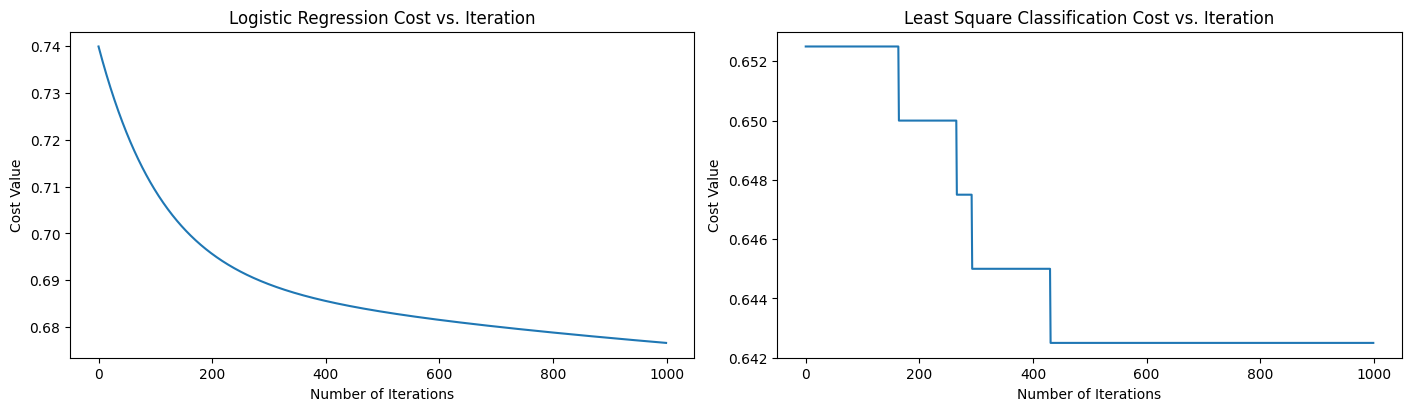

In [129]:
fig, (Logisticcurve, LeastSqcurve) = plt.subplots(1, 2, constrained_layout=True, figsize=(14, 4))
Logisticcurve.plot(costHistoryStoreLogistic)
LeastSqcurve.plot(costHistoryStoreLeastSquare)
Logisticcurve.set_title("Logistic Regression Cost vs. Iteration");  LeastSqcurve.set_title("Least Square Classification Cost vs. Iteration")
Logisticcurve.set_ylabel('Cost Value')             ;  LeastSqcurve.set_ylabel('Cost Value')
Logisticcurve.set_xlabel('Number of Iterations')   ;  LeastSqcurve.set_xlabel('Number of Iterations')
plt.show()

###**Explaination of Above Results**

**The major difference between the Logistic and Least Square Classification**

1. Logistic Regression: Logistic regression uses the logistic (sigmoid) function to map a linear combination of input features to the probability of belonging to the positive class.
2. Least Squares Classification: It models the distribution of features for each class and computes linear combinations of input features to find the best discriminative boundary that minimizes the squared Euclidean distances between data points of the same class while maximizing the distances between different classes.
**Difference between the curves of logistic regression and least square classification**
1. In the case of logistic regression it can be interpreted that the value of cost function reduces as the number of iterations. It can also be seen that the value varies as a continous fucntion.
2. On the other hand, in least sqaure classification there are varied fluctations on the value of cost function as the number of iterations. The reason behind is that the discriminating line fluctates between the classes.

##Accuracy For Least Square Method

In [130]:
y_test_pred = lsc.predict(X_test)
accuracy = np.mean(y_test_pred == y_test)
print("Test Accuracy Of Least Square Classification : " + str(accuracy))

y_train_pred = lsc.predict(X_train)
accuracy = np.mean(y_train_pred == y_train)
print("Training Accuracy Of Least Square Classification : " + str(accuracy))

Test Accuracy Of Least Square Classification : 0.27
Training Accuracy Of Least Square Classification : 0.3575


###**Comparing Costs for Test Set**

**Cost of Test Set for Model Trainied with Logistic Regression**

In [131]:
costTestSetLogistic = costFunctionLogistic(X_test, y_test, wFinalValLogistic, bFinalValLogistic)
print(costTestSetLogistic)

0.6355356360312114


**Cost of Test Set for Model Trainied with Least Square Classification**

---



In [132]:
costTestSetLeastSq = lsc.error(X_test, y_test)
print(costTestSetLeastSq)

0.73


**Plotting the results**

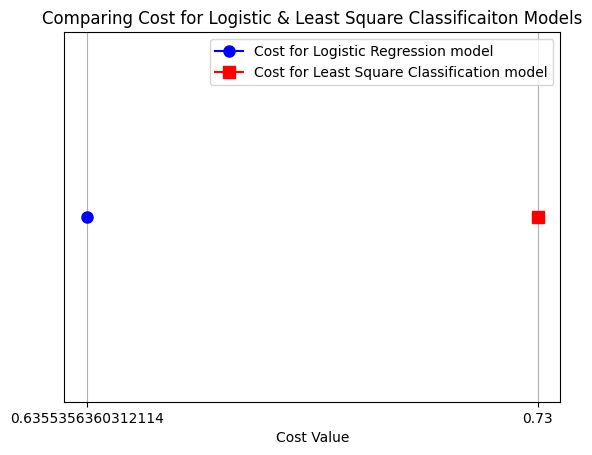

In [133]:
fig, ax = plt.subplots()

# Plot markers for number1 and number2
ax.plot(costTestSetLogistic, 0, marker='o', markersize=8, color='blue', label='Cost for Logistic Regression model')
ax.plot(costTestSetLeastSq, 0, marker='s', markersize=8, color='red', label='Cost for Least Square Classification model')

# Add a legend
ax.legend()

# Set ticks and labels for the number line
ax.set_xticks([costTestSetLogistic, costTestSetLeastSq])
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xticklabels([costTestSetLogistic, costTestSetLeastSq])

# Add labels and title
ax.set_xlabel('Cost Value')
ax.set_title('Comparing Cost for Logistic & Least Square Classificaiton Models')

# Show the plot
plt.grid(True)
plt.show()


**Results**

We can cleary see that the cost for training the model with logistic regression is significantly less than the cost of training the model using Least Square Classification model.

# **_5. References_**

1.   https://medium.com/analytics-vidhya/l1-vs-l2-regularization-which-is-better-d01068e6658c
2.   https://medium.com/analytics-vidhya/regularization-understanding-l1-and-l2-regularization-for-deep-learning-a7b9e4a409bf
3. https://www.javatpoint.com/regression-analysis-in-machine-learning
4. https://www.geeksforgeeks.org/ml-linear-regression/
5. https://towardsdatascience.com/a-beginners-guide-to-regression-analysis-in-machine-learning-8a828b491bbf
6. https://towardsdatascience.com/derivation-of-least-squares-regressor-and-classifier-708be1358fe9
7. https://www.javatpoint.com/logistic-regression-in-machine-learning#:~:text=Logistic%20regression%20is%20one%20of,of%20a%20categorical%20dependent%20variable.
8. https://www.analyticsvidhya.com/blog/2021/10/building-an-end-to-end-logistic-regression-model/

